In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, confusion_matrix,classification_report
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import plotly.io as pio
from sklearn.model_selection import KFold
from sklearn.metrics import ConfusionMatrixDisplay

In [5]:
data = pd.read_csv("Dataset-MobilePrice/train.csv")
df_train=pd.DataFrame(data)
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
data_test=pd.read_csv(r"Dataset-MobilePrice/test.csv")
df_test=pd.DataFrame(data_test)
df_test.head()


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


| Feature         | Description              | Notes                                           |
| ---          | ---                   | ---                                             |
| battery_power | power   | -     |
| blue    | does have bluetooth or doesn't| 1: does, 0:does not                   |
| clock_speed  | CPU frequency   | higher speed: faster execution of tasks, lower speed: slower performance   |
| dual_sim | does have dual sim or not | 0: does't, 1:does|
| fc| front camera megapixel | 1,2,..,13|
| four_g| 1: has 4G, 0:doesn't|
| int_memory| internal memory Gigabytes| 7,53,41|
| m_dep| mobile depth in cm| 0.6,0.7|
| mobile_wt| mobile weight in gr|188,136, |
| n_cores| Processers cores| 2,3,4|
| pc| primary camera| 2,6|
| px_height| pixel resolution height| 20,905,..|
| px_width| pixel resolution width| 756,1988,..|
| ram| Random access memory in megabytes| 2549, 2631|
| sc_h| screen height of mobile in cm| 9,7|
| sc_w| screen width of mobile in cm| 7,3|
| talk_time| Longest call without interruption in minutes| 19,7|
| three_g| Has 3G or does not have| 0: doesn't, 1: does|
| touch_screen| Does it have a touchscreen or not| 0:doesn't, 1:does|
| wifi| Would it be possible to be connected to wifi or not| 0: wouldn't, 1: would| 
| price_range| Target value| 0: Low cost, 1: Mid cost, 2: High cost, 3: Very high cost|



In [7]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [10]:
df_test.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


* The train dataset has 2000 rows, and the test dataset has 1000 rows

* The test data set has an extra column compared to the train dataset, called id, and it does not have the target column; and it is our task to find the price for each id.

<span style="font-size:20px; color: magenta; font-weight:bold;">Data Proccessing</span>

In [11]:
df_train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [12]:
df_test.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [13]:
print(f" number of duplicated row in train dataset: {df_train.duplicated().sum()}")
print(f" number of duplicated row in test dataset: {df_test.duplicated().sum()}")

 number of duplicated row in train dataset: 0
 number of duplicated row in test dataset: 0


In [14]:
# in the original data set the categorical columns have been marked as integer
cat_cols_train=['blue','dual_sim','four_g','n_cores','three_g','touch_screen','wifi','price_range']
df1_train=df_train.copy()
df1_train[cat_cols_train]=df1_train[cat_cols_train].astype('category')
df1_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   battery_power  2000 non-null   int64   
 1   blue           2000 non-null   category
 2   clock_speed    2000 non-null   float64 
 3   dual_sim       2000 non-null   category
 4   fc             2000 non-null   int64   
 5   four_g         2000 non-null   category
 6   int_memory     2000 non-null   int64   
 7   m_dep          2000 non-null   float64 
 8   mobile_wt      2000 non-null   int64   
 9   n_cores        2000 non-null   category
 10  pc             2000 non-null   int64   
 11  px_height      2000 non-null   int64   
 12  px_width       2000 non-null   int64   
 13  ram            2000 non-null   int64   
 14  sc_h           2000 non-null   int64   
 15  sc_w           2000 non-null   int64   
 16  talk_time      2000 non-null   int64   
 17  three_g        2000 non-null   ca

In [16]:
cat_cols_test=['blue','dual_sim','four_g','n_cores','three_g','touch_screen','wifi']
df1_test=df_test.copy()
df1_test[cat_cols_test]=df1_test[cat_cols_test].astype('category')
df1_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             1000 non-null   int64   
 1   battery_power  1000 non-null   int64   
 2   blue           1000 non-null   category
 3   clock_speed    1000 non-null   float64 
 4   dual_sim       1000 non-null   category
 5   fc             1000 non-null   int64   
 6   four_g         1000 non-null   category
 7   int_memory     1000 non-null   int64   
 8   m_dep          1000 non-null   float64 
 9   mobile_wt      1000 non-null   int64   
 10  n_cores        1000 non-null   category
 11  pc             1000 non-null   int64   
 12  px_height      1000 non-null   int64   
 13  px_width       1000 non-null   int64   
 14  ram            1000 non-null   int64   
 15  sc_h           1000 non-null   int64   
 16  sc_w           1000 non-null   int64   
 17  talk_time      1000 non-null   int

In [17]:
print('*'*7, 'Statistical Describtion of categorical feature in Train Set', '*'*7)
display(df1_train.select_dtypes('category').describe().T)

print('\n','*'*7, 'Statistical Describtion of categorical feature in Test Set', '*'*7)
display(df1_test.select_dtypes('category').describe().T)

******* Statistical Describtion of categorical feature in Train Set *******


,count,unique,top,freq
blue,2000,2,0,1010
dual_sim,2000,2,1,1019
four_g,2000,2,1,1043
n_cores,2000,8,4,274
three_g,2000,2,1,1523
touch_screen,2000,2,1,1006
wifi,2000,2,1,1014
price_range,2000,4,0,500



 ******* Statistical Describtion of categorical feature in Test Set *******


,count,unique,top,freq
blue,1000,2,1,516
dual_sim,1000,2,1,517
four_g,1000,2,0,513
n_cores,1000,8,4,142
three_g,1000,2,1,756
touch_screen,1000,2,0,500
wifi,1000,2,1,507


******* Description of categorical feature in Train Set *******


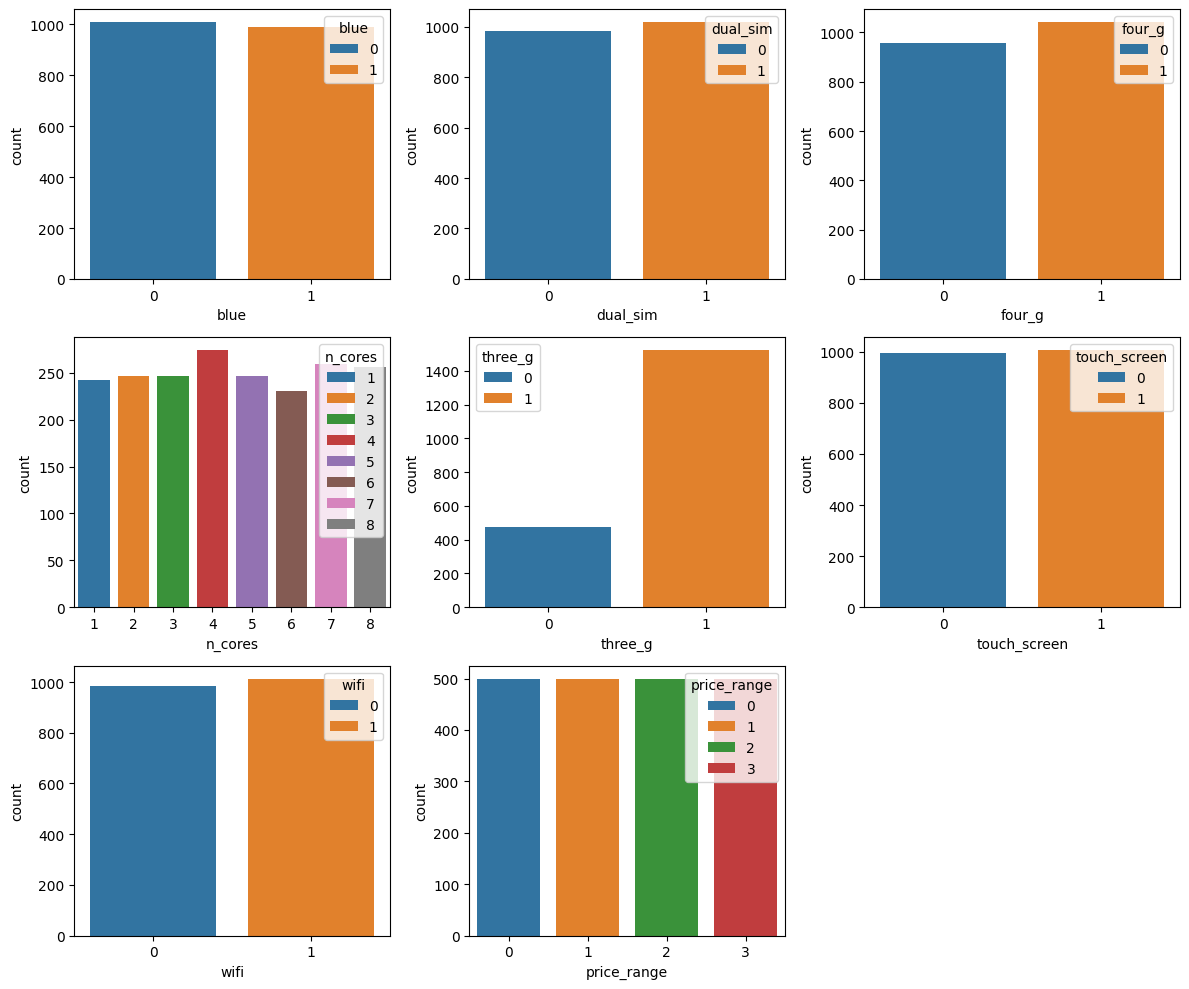

In [19]:
n = len(cat_cols_train)
rows = 3
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(12, 10))
axes = axes.flatten()  
for i, col in enumerate(cat_cols_train):
    sns.countplot(data=df1_train, x=col, ax=axes[i], hue=col)
# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  
print('*'*7, 'Description of categorical feature in Train Set', '*'*7)
plt.tight_layout()
plt.savefig("Figures-Mobile Price/1/categorical_features.png", dpi=300, bbox_inches='tight')
plt.show()

******* Description of categorical feature in Test Set *******


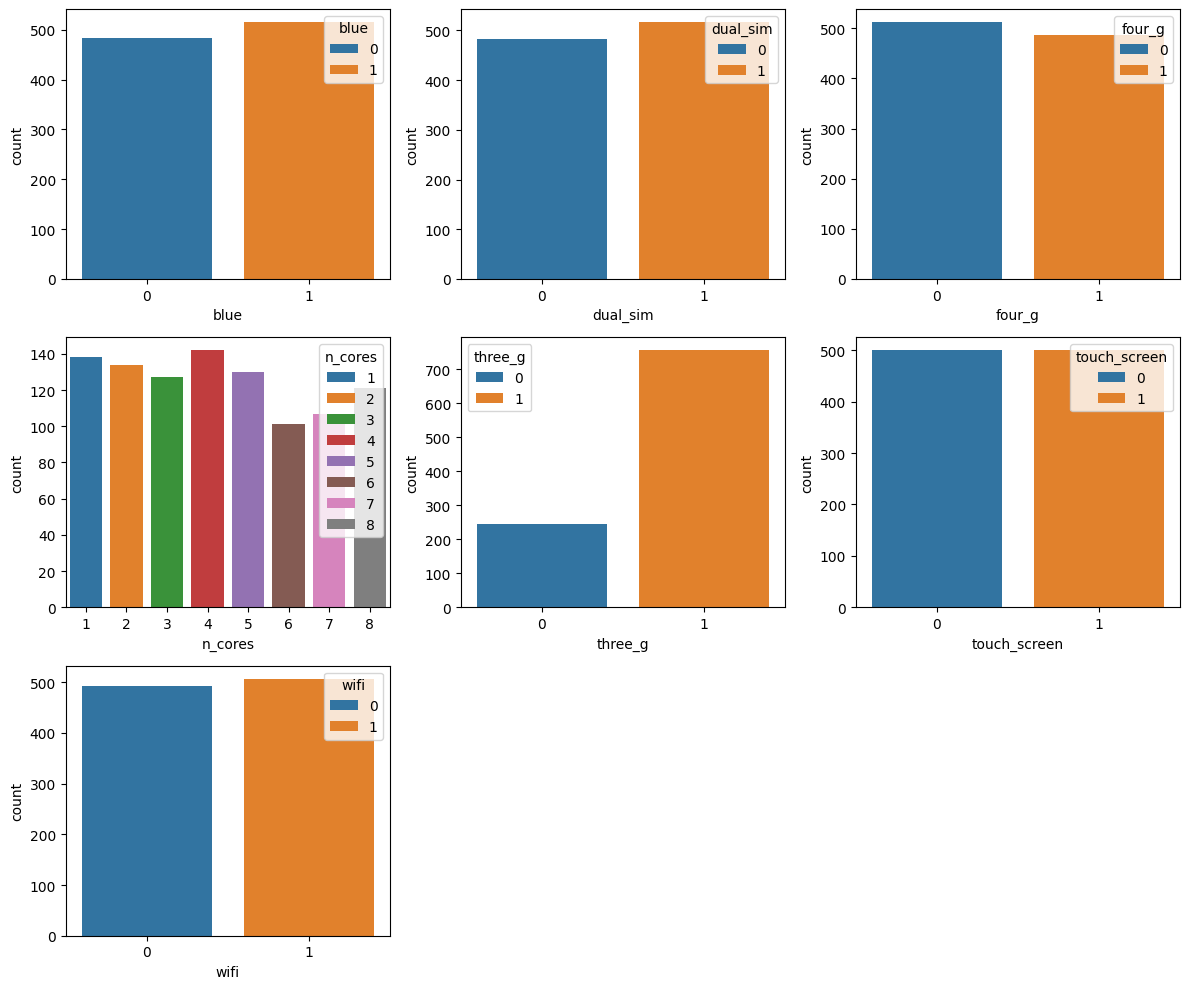

In [20]:
n = len(cat_cols_test)
rows = 3
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(12, 10))
axes = axes.flatten()  
for i, col in enumerate(cat_cols_test):
    sns.countplot(data=df1_test, x=col, ax=axes[i], hue=col)
# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  
print('*'*7, 'Description of categorical feature in Test Set', '*'*7)
plt.tight_layout()
plt.savefig("Figures-Mobile Price/1/Test_categorical_features.png", dpi=300, bbox_inches='tight')
plt.show()

In [21]:
print('*'*7, 'Description of categorical feature in Train Set', '*'*7)
display(df1_train.select_dtypes('int64','float64').describe().T)

print('\n','*'*7, 'Description of categorical feature in Test Set', '*'*7)
display(df1_test.select_dtypes('int64','float64').describe().T)

******* Description of categorical feature in Train Set *******


,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.5185,439.418206,501.0,851.75,1226.0,1615.25,1998.0
fc,2000.0,4.3095,4.341444,0.0,1.00,3.0,7.00,19.0
int_memory,2000.0,32.0465,18.145715,2.0,16.00,32.0,48.00,64.0
mobile_wt,2000.0,140.2490,35.399655,80.0,109.00,141.0,170.00,200.0
pc,2000.0,9.9165,6.064315,0.0,5.00,10.0,15.00,20.0
px_height,2000.0,645.1080,443.780811,0.0,282.75,564.0,947.25,1960.0
px_width,2000.0,1251.5155,432.199447,500.0,874.75,1247.0,1633.00,1998.0
ram,2000.0,2124.2130,1084.732044,256.0,1207.50,2146.5,3064.50,3998.0
sc_h,2000.0,12.3065,4.213245,5.0,9.00,12.0,16.00,19.0
sc_w,2000.0,5.7670,4.356398,0.0,2.00,5.0,9.00,18.0



 ******* Description of categorical feature in Test Set *******


,count,mean,std,min,25%,50%,75%,max
id,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
battery_power,1000.0,1248.510,432.458227,500.0,895.00,1246.5,1629.25,1999.0
fc,1000.0,4.593,4.463325,0.0,1.00,3.0,7.00,19.0
int_memory,1000.0,33.652,18.128694,2.0,18.00,34.5,49.00,64.0
mobile_wt,1000.0,139.511,34.851550,80.0,109.75,139.0,170.00,200.0
pc,1000.0,10.054,6.095099,0.0,5.00,10.0,16.00,20.0
px_height,1000.0,627.121,432.929699,0.0,263.75,564.5,903.00,1907.0
px_width,1000.0,1239.774,439.670981,501.0,831.75,1250.0,1637.75,1998.0
ram,1000.0,2138.998,1088.092278,263.0,1237.25,2153.5,3065.50,3989.0
sc_h,1000.0,11.995,4.320607,5.0,8.00,12.0,16.00,19.0


* If we look at the data shallow, there wouldn't be any suspicious data, but for example, the min of px_height is 0, which can not be, and also, for example, the width of the mobile can not be larger than height, and we need to check for that.

In [22]:
df1_train[df1_train.px_height<df1_train.px_width]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [23]:
df1_test[df1_test.px_height<df1_test.px_width]

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


Since in all rows px_width is larger that px_height, possibly the name of columns should be exchanged.

In [24]:
df1_train[df1_train.sc_h<df1_train.sc_w]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [25]:
df1_test[df1_test.sc_h<df1_test.sc_w]

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi


In [26]:
df1_train[df1_train.px_height==0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,...,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,...,0,994,1958,7,5,7,1,1,0,1


since there are a few incorrect data, in the following we can remove them.

In [27]:
df1_test[df1_test.px_height==0]

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
420,421,986,0,2.8,0,0,1,26,0.1,80,...,9,0,1214,1316,7,5,8,1,0,0
819,820,1992,1,1.3,1,8,1,43,1.0,153,...,15,0,883,2179,7,6,20,1,1,0


since there are a few incorrect data, in the following we can remove them.

In [28]:
df1_train[df1_train.sc_w==0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
12,1815,0,2.8,0,2,0,33,0.6,159,4,...,607,748,1482,18,0,2,1,0,0,1
24,503,0,1.2,1,5,1,8,0.4,111,3,...,201,1245,2583,11,0,12,1,0,0,1
33,1310,1,2.2,1,0,1,51,0.6,100,4,...,178,1919,3845,7,0,12,1,1,0,3
42,1253,1,0.5,1,5,1,5,0.2,152,2,...,685,714,1878,15,0,4,1,1,0,1
50,1547,1,3.0,1,2,1,14,0.7,198,3,...,1042,1832,2059,5,0,15,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,772,0,1.0,1,0,1,23,0.6,97,7,...,317,1805,2782,7,0,17,1,0,0,2
1920,591,1,0.5,1,1,1,16,0.9,90,6,...,892,1603,3746,5,0,5,1,1,0,3
1946,590,1,1.2,1,0,0,32,0.4,141,6,...,227,509,1817,10,0,6,0,1,0,0
1954,686,1,2.7,1,0,0,36,0.1,194,4,...,64,745,1503,10,0,13,0,0,0,0


we can not easily remove all rows

In [29]:
df1_test[df1_test.sc_w==0]

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
9,10,1520,0,0.5,0,1,0,25,0.5,171,...,20,52,1009,651,6,0,5,1,0,1
13,14,1190,1,2.2,1,5,0,19,0.9,158,...,15,227,1856,992,13,0,16,1,1,0
19,20,1488,0,2.6,0,9,0,37,0.7,189,...,20,47,559,2524,5,0,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,940,1517,1,2.2,1,11,0,19,0.3,179,...,16,291,1592,1972,11,0,13,0,0,1
958,959,1066,1,0.9,0,4,0,43,0.4,101,...,11,876,880,3856,14,0,6,1,0,1
973,974,1796,1,0.5,0,0,0,44,0.2,169,...,4,841,1803,1378,12,0,13,1,0,1
987,988,905,0,1.9,1,11,1,12,0.7,173,...,12,410,1021,852,19,0,3,1,1,0


Also we can not remove all rows that exist here

In [31]:
df2_train=df1_train.copy()
df2_train.rename(columns={'px_width':'px_height', 'px_height':'px_width'},inplace=True)
df2_train[df2_train.px_height<df2_train.px_width]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,px_height,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [32]:
df2_test=df1_test.copy()
df2_test.rename(columns={'px_width':'px_height', 'px_height':'px_width'},inplace=True)
df2_test[df2_test.px_height<df2_test.px_width]

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_width,px_height,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi


In [33]:
df2_train=df2_train[df2_train.px_width!=0].reset_index(drop=True)
df2_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,px_height,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [34]:
df2_train.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_width,px_height,ram,sc_h,sc_w,talk_time
count,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000
mean,1238.391391,1.521722,4.308809,32.057558,0.501902,140.262763,9.915916,645.753754,1251.276276,2123.511512,12.308809,5.770270,11.010511
std,439.369721,0.816240,4.343101,18.141468,0.288411,35.404007,6.067302,443.532906,432.064000,1084.701280,4.213652,4.356633,5.464813
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,0.000000,1.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.250000,0.700000,1.000000,16.000000,0.200000,109.000000,5.000000,284.000000,874.250000,1206.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,10.000000,565.500000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.000000,2.200000,7.000000,48.000000,0.800000,170.000000,15.000000,947.750000,1632.750000,3063.750000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


In [35]:
df2_test=df2_test[df2_test.px_width!=0].reset_index(drop=True)
df2_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_width,px_height,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [36]:
df2_test.describe()

,id,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_width,px_height,ram,sc_h,sc_w,talk_time
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,500.259519,1248.028056,1.539880,4.594188,33.650301,0.517435,139.557114,10.050100,628.377756,1240.157315,2139.782565,12.005010,5.315631,11.079158
std,288.920781,432.170674,0.829105,4.464127,18.142834,0.280415,34.832890,6.099106,432.450690,439.965762,1088.870164,4.319136,4.244245,5.495028
min,1.000000,500.000000,0.500000,0.000000,2.000000,0.100000,80.000000,0.000000,2.000000,501.000000,263.000000,5.000000,0.000000,2.000000
25%,250.250000,895.000000,0.700000,1.000000,18.000000,0.300000,110.000000,5.000000,265.750000,831.250000,1235.750000,8.000000,2.000000,6.250000
50%,500.500000,1246.500000,1.500000,3.000000,34.500000,0.500000,139.000000,10.000000,565.000000,1251.500000,2153.500000,12.000000,5.000000,11.000000
75%,749.750000,1629.000000,2.300000,7.000000,49.000000,0.800000,170.000000,16.000000,905.000000,1639.250000,3066.500000,16.000000,8.000000,16.000000
max,1000.000000,1999.000000,3.000000,19.000000,64.000000,1.000000,200.000000,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000


what we can do for sc_w=0? since the number of rows containing sc_w is not low meaning we can not remove them and also sc_w= is not rational.

In [37]:
percent_invalid = (df2_train['sc_w'] == 0).sum() / len(df2_train) * 100
print(f"Invalid screen width: {percent_invalid:.2f}%")

Invalid screen width: 8.96%


if the invalid number is <10% , it would be usually better to put imput but first we need to see with which other feature is related

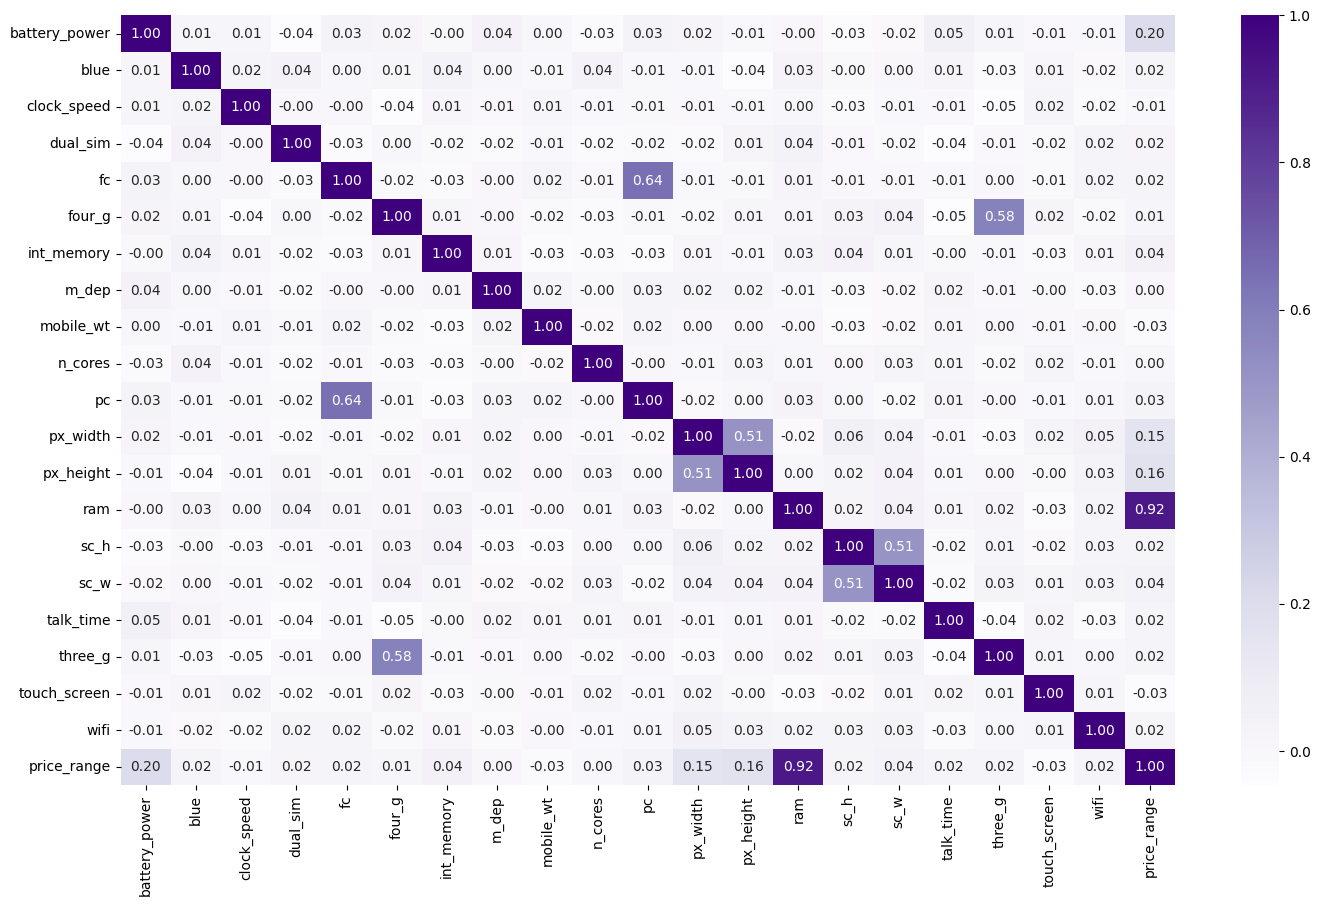

In [38]:
plt.figure(figsize=(17,10))
sns.heatmap(df2_train.corr(), annot=True, fmt=".2f", cmap='Purples')
plt.savefig("Figures-Mobile Price/1/heatmap_corr.png", 
            dpi=300, bbox_inches='tight')

plt.show()

Since sc_h is the best available predictor, we can impute screen_width = 0 using the median screen width for each screen height group.


In [39]:
# first we replace 0 with NaN 
df2_train['sc_w'] = df2_train['sc_w'].replace(0, np.nan)
# Impute using grouped median by screen_height
df2_train['sc_w'] = df2_train.groupby('sc_h')['sc_h'].transform(lambda x: x.fillna(x.median()))

In [40]:
df2_train['sc_w'].describe()

count    1998.000000
mean       12.308809
std         4.213652
min         5.000000
25%         9.000000
50%        12.000000
75%        16.000000
max        19.000000
Name: sc_w, dtype: float64

In [41]:
df2_train['sc_w'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1998 entries, 0 to 1997
Series name: sc_w
Non-Null Count  Dtype
--------------  -----
1998 non-null   int64
dtypes: int64(1)
memory usage: 15.7 KB


In [43]:
percent_invalid = (df2_test['sc_w'] == 0).sum() / len(df2_test) * 100
print(f"Invalid screen width: {percent_invalid:.2f}%")

Invalid screen width: 11.22%


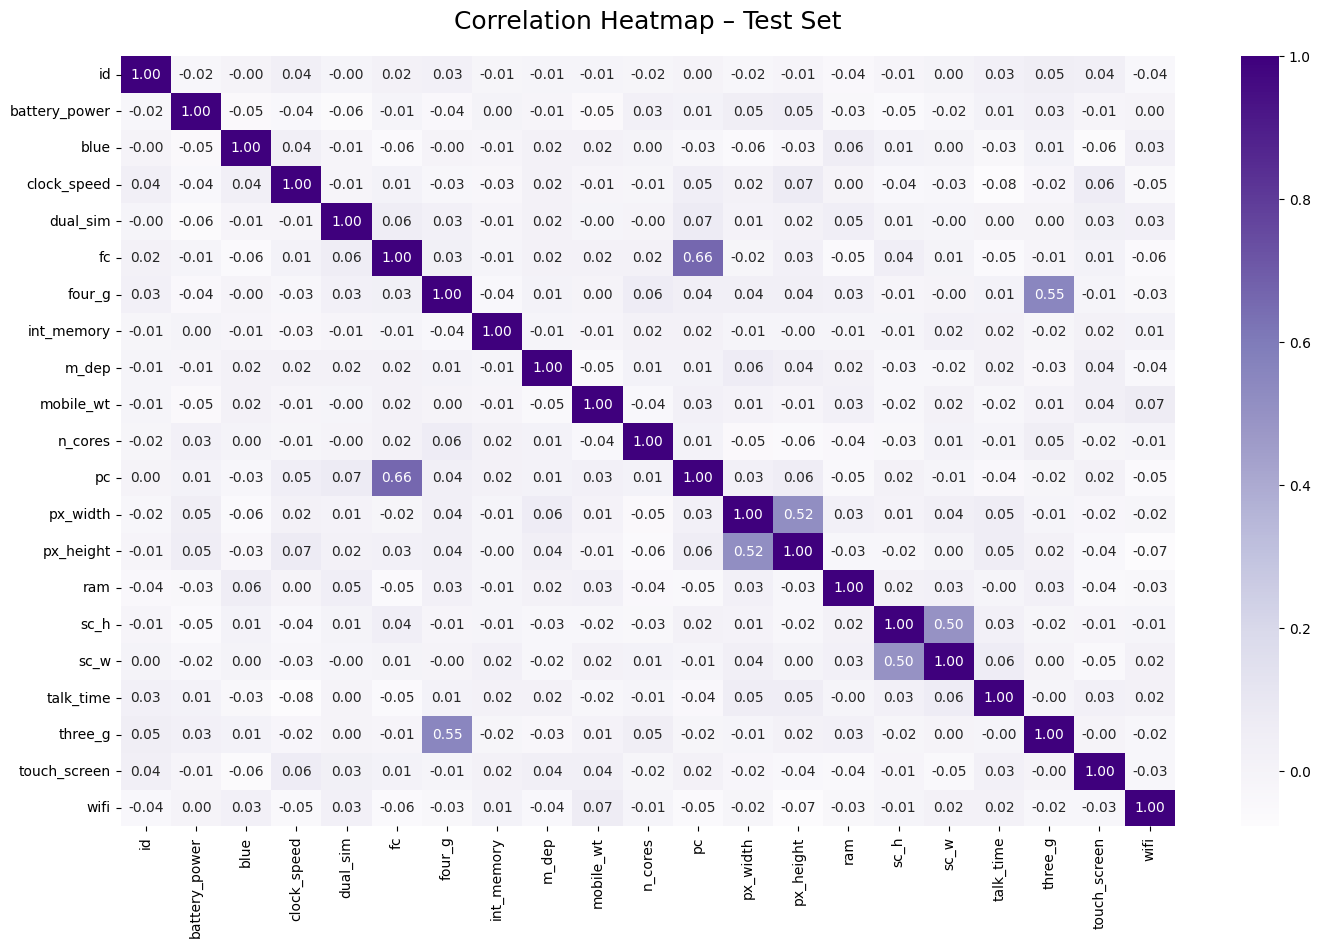

In [42]:
plt.figure(figsize=(17,10))
sns.heatmap(df2_test.corr(), annot=True, fmt=".2f", cmap='Purples')

plt.title("Correlation Heatmap – Test Set", fontsize=18, pad=20)
plt.savefig("Figures-Mobile Price/1/heatmap_test_corr.png", 
            dpi=300, bbox_inches='tight')
plt.show()


In [356]:
# first we replace 0 with NaN 
df2_test['sc_w'] = df2_test['sc_w'].replace(0, np.nan)
# Impute using grouped median by screen_height
df2_test['sc_w'] = df2_test.groupby('sc_h')['sc_h'].transform(lambda x: x.fillna(x.median()))

In [357]:
df2_test['sc_w'].describe()

count    998.000000
mean      12.005010
std        4.319136
min        5.000000
25%        8.000000
50%       12.000000
75%       16.000000
max       19.000000
Name: sc_w, dtype: float64

the data does not have any other irrational number. We can either continue with the cleaned data we made or delete the columns that have noise. I assume that since these columns possibly do not affect the price significantly, we can drop those columns.

In [44]:
df3_train=df2_train.drop(['sc_w','sc_h','px_height','px_width'], axis=1)
df3_test=df2_test.drop(['id','sc_w','sc_h','px_height','px_width'], axis=1)

In [45]:
df3_train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,1998.0,1238.391391,439.369721,501.0,851.25,1226.0,1615.00,1998.0
clock_speed,1998.0,1.521722,0.816240,0.5,0.70,1.5,2.20,3.0
fc,1998.0,4.308809,4.343101,0.0,1.00,3.0,7.00,19.0
int_memory,1998.0,32.057558,18.141468,2.0,16.00,32.0,48.00,64.0
m_dep,1998.0,0.501902,0.288411,0.1,0.20,0.5,0.80,1.0
mobile_wt,1998.0,140.262763,35.404007,80.0,109.00,141.0,170.00,200.0
pc,1998.0,9.915916,6.067302,0.0,5.00,10.0,15.00,20.0
ram,1998.0,2123.511512,1084.701280,256.0,1206.50,2146.5,3063.75,3998.0
talk_time,1998.0,11.010511,5.464813,2.0,6.00,11.0,16.00,20.0


In [46]:
df3_test.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,998.0,1248.028056,432.170674,500.0,895.00,1246.5,1629.0,1999.0
clock_speed,998.0,1.539880,0.829105,0.5,0.70,1.5,2.3,3.0
fc,998.0,4.594188,4.464127,0.0,1.00,3.0,7.0,19.0
int_memory,998.0,33.650301,18.142834,2.0,18.00,34.5,49.0,64.0
m_dep,998.0,0.517435,0.280415,0.1,0.30,0.5,0.8,1.0
mobile_wt,998.0,139.557114,34.832890,80.0,110.00,139.0,170.0,200.0
pc,998.0,10.050100,6.099106,0.0,5.00,10.0,16.0,20.0
ram,998.0,2139.782565,1088.870164,263.0,1235.75,2153.5,3066.5,3989.0
talk_time,998.0,11.079158,5.495028,2.0,6.25,11.0,16.0,20.0


* Depth on mobile in cm has been reported between 0.1 and 1 cm, which can not be completely true, and depth on mobile is between 0.5 and 1.

In [47]:
df3_train[df3_train['m_dep']<0.5]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,price_range
9,509,1,0.6,1,2,1,9,0.1,93,5,15,513,12,1,0,0,0
10,769,1,2.9,1,0,0,9,0.1,182,5,1,3946,7,0,0,0,3
16,838,0,0.5,0,1,1,13,0.1,196,8,4,3554,19,1,0,1,3
17,595,0,0.9,1,7,1,23,0.1,121,3,17,3752,18,1,1,0,3
22,1949,0,2.6,1,4,0,47,0.3,199,4,7,1433,20,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,586,0,2.8,0,2,0,15,0.2,83,3,11,2592,3,0,0,0,1
1990,674,1,2.9,1,1,0,21,0.2,198,3,4,1180,4,1,1,1,0
1992,858,0,2.2,0,1,0,50,0.1,84,1,2,3978,3,1,1,0,3
1994,1965,1,2.6,1,0,0,39,0.2,187,4,3,2032,16,1,1,1,2


Since there are lots of rows that are not valid, we can flag this number and then use the median to fill those invalid inputs.

In [48]:
df3_train['m_dep'] = df3_train['m_dep'].apply(lambda x: np.nan if x < 0.4 else x) 

In [49]:
median_depth = df3_train['m_dep'].median()
df3_train['m_dep'] = df3_train['m_dep'].fillna(median_depth)

In [50]:
df3_train.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,ram,talk_time
count,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000
mean,1238.391391,1.521722,4.308809,32.057558,0.690841,140.262763,9.915916,2123.511512,11.010511
std,439.369721,0.816240,4.343101,18.141468,0.149146,35.404007,6.067302,1084.701280,5.464813
min,501.000000,0.500000,0.000000,2.000000,0.400000,80.000000,0.000000,256.000000,2.000000
25%,851.250000,0.700000,1.000000,16.000000,0.600000,109.000000,5.000000,1206.500000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.700000,141.000000,10.000000,2146.500000,11.000000
75%,1615.000000,2.200000,7.000000,48.000000,0.800000,170.000000,15.000000,3063.750000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,20.000000,3998.000000,20.000000


In [51]:
df3_test['m_dep'] = df3_test['m_dep'].apply(lambda x: np.nan if x < 0.4 else x) 

In [52]:
median_depth = df3_test['m_dep'].median()
df3_test['m_dep'] = df3_test['m_dep'].fillna(median_depth)

In [53]:
df3_test.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,ram,talk_time
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,1248.028056,1.539880,4.594188,33.650301,0.683267,139.557114,10.050100,2139.782565,11.079158
std,432.170674,0.829105,4.464127,18.142834,0.154733,34.832890,6.099106,1088.870164,5.495028
min,500.000000,0.500000,0.000000,2.000000,0.400000,80.000000,0.000000,263.000000,2.000000
25%,895.000000,0.700000,1.000000,18.000000,0.600000,110.000000,5.000000,1235.750000,6.250000
50%,1246.500000,1.500000,3.000000,34.500000,0.700000,139.000000,10.000000,2153.500000,11.000000
75%,1629.000000,2.300000,7.000000,49.000000,0.800000,170.000000,16.000000,3066.500000,16.000000
max,1999.000000,3.000000,19.000000,64.000000,1.000000,200.000000,20.000000,3989.000000,20.000000


* But I assume that would be better if we drop this column as well

In [54]:
df4_train=df3_train.drop(['m_dep'], axis=1)
df4_test=df3_test.drop(['m_dep'],axis=1)

In [55]:
df4_train.to_csv("Dataset-MobilePrice/df4_train.csv", index=False)
df4_test.to_csv("Dataset-MobilePrice/df4_test.csv", index=False)

# To prevent the notebook from becoming too heavy and to maintain a clean workflow, the fully processed datasets (df4_train and df4_test) are saved to disk. This allows us to perform the exploratory analysis of the train and test sets, as well as the modeling phase, in separate notebooks without repeatedly running the preprocessing pipeline.
